## This Notebook aims to answer the following questions:
**Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?**

**Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?**

**Q3: Do movies or shows on Netflix get better IMDb ratings (a) or more IMDb votes (b) and do they differ in runtime (c)?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FixedLocator, FuncFormatter
from scipy.stats import pearsonr
from transformers import pipeline
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from typing import Optional, Dict, List, Tuple
from scipy.stats import levene

In [2]:
df = pd.read_csv("Netflix data classified")
df = df.drop(columns=["Unnamed: 0", "index"], axis=1)

In [3]:
# BERT model (used because it performed the best in A3)
# the classification was stored and exported, so it doesn't have to be run every time

# original Data Source: 
# https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download

# df = pd.read_csv("Netflix TV Shows and Movies.csv")
# df.drop(["id", "imdb_id"], axis=1, inplace=True)

# sentiment_pipeline = pipeline(model=f"cardiffnlp/twitter-roberta-base-sentiment-latest")
# df = df.dropna(subset=["description"]) 
# df_class = sentiment_pipeline(df["description"].to_list())
# df["Bert_class"] = [result["label"] for result in df_class]

# df.to_csv("Netflix data classified", sep=",")

In [4]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5278.000000,5278.000000,5278.000000,5.263000e+03
mean,2015.878363,79.210117,6.534236,2.342496e+04
std,7.348958,38.928918,1.160390,8.716504e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.220000e+02
50%,2018.000000,87.000000,6.600000,2.281000e+03
75%,2020.000000,106.000000,7.400000,1.015500e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


## Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?

In [5]:
def year_rating_r(type: str, data: pd.DataFrame = df) -> Tuple[float]:
    
    filtered_df = data[data["type"] == type]
    filtered_df_mean = filtered_df.groupby("release_year")["imdb_score"].mean()

    r, p = pearsonr(filtered_df_mean.index, filtered_df_mean)
    
    return filtered_df, filtered_df_mean, r, p

#Movies
movies_df, movies_df_mean, r, p = year_rating_r("MOVIE")
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r:.2f}, p = {p:.4f}.\n")

#Shows
shows_df, shows_df_mean, r, p = year_rating_r("SHOW")
print(f"No relationship between the release year and the IMDb ratings were found for Netflix shows, r = {r:.2f}, p = {p:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.43, p = 0.0003.

No relationship between the release year and the IMDb ratings were found for Netflix shows, r = 0.01, p = 0.9555.


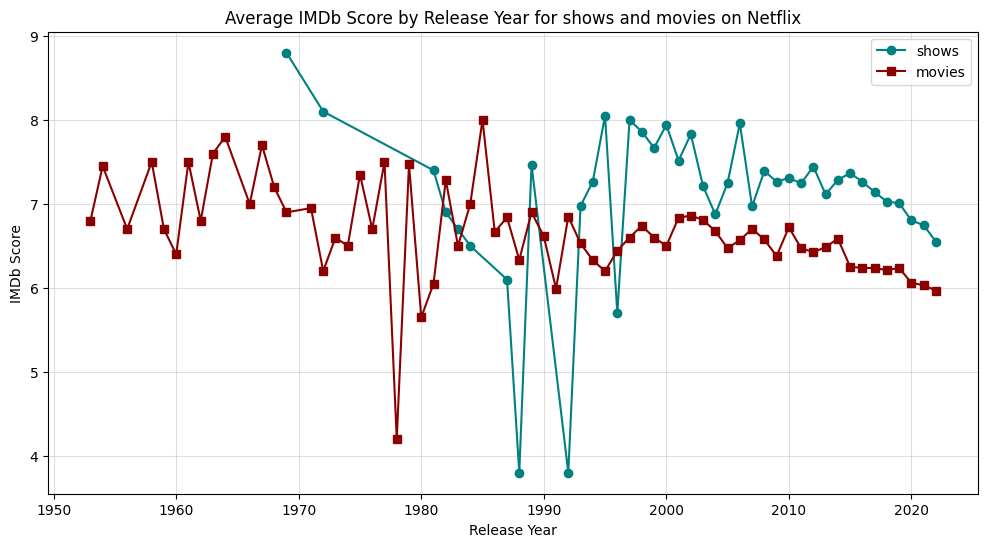

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(
    shows_df_mean.index,
    shows_df_mean,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_df_mean.index,
    movies_df_mean,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Average IMDb Score by Release Year for shows and movies on Netflix")
plt.grid(True, alpha=.4)
plt.legend()
#1978 only one movie "Bandie"

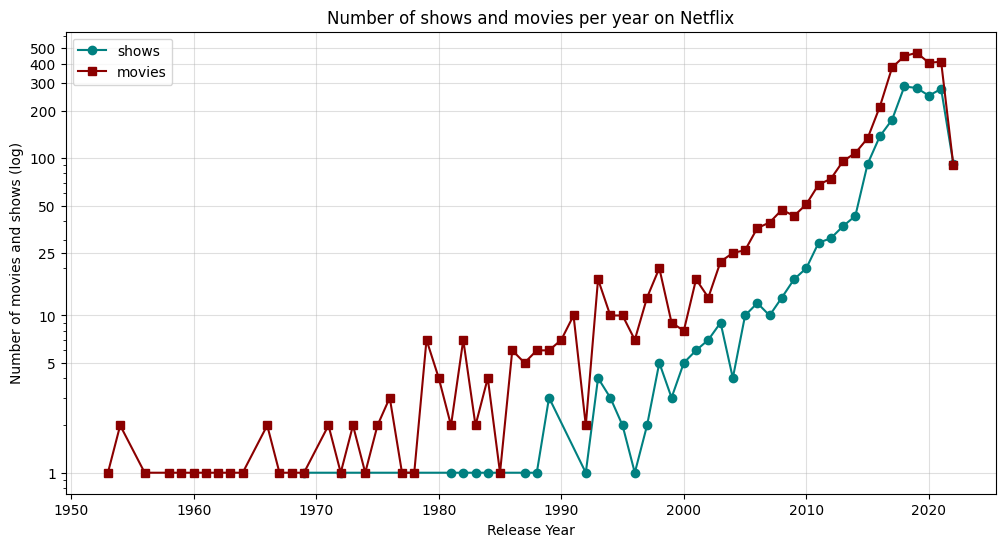

In [7]:
movies_year = movies_df.groupby("release_year")["release_year"].count()
shows_year = shows_df.groupby("release_year")["release_year"].count()

plt.figure(figsize=(12, 6))
plt.plot(
    shows_year.index,
    shows_year,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_year.index,
    movies_year,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("Number of movies and shows (log)")
plt.yscale("log")

ax = plt.gca()
custom_ticks = [1, 5, 10, 25, 50, 100, 200, 300, 400, 500]
ax.yaxis.set_major_locator(FixedLocator(custom_ticks))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.title("Number of shows and movies per year on Netflix")
plt.grid(True, alpha=.4)
plt.legend()

In [8]:
#Analysis starting year 2000
df_filtered = df[df["release_year"] >= 2000]
#Movies
movies_df_filterd, movies_df_mean_filtered, r_filtered, p_filtered = year_rating_r("MOVIE", df_filtered)
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r_filtered:.2f}, p = {p_filtered:.4f}.\n")

#Shows
showss_df_filterd, shows_df_mean_filtered, r_filtered, p_filtered = year_rating_r("SHOW", df_filtered)
print(f"Shows on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r_filtered:.2f}, p = {p_filtered:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.87, p = 0.0000.

Shows on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.68, p = 0.0004.


In [9]:
movies_df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,3403.000000,3403.000000,3403.000000,3.388000e+03
mean,2015.200118,101.569791,6.267793,2.670682e+04
std,8.226595,27.756713,1.116425,9.474863e+04
min,1953.000000,8.000000,1.500000,5.000000e+00
25%,2014.000000,88.000000,5.600000,5.807500e+02
50%,2018.000000,100.000000,6.400000,2.640000e+03
75%,2020.000000,116.000000,7.100000,1.228875e+04
max,2022.000000,235.000000,9.000000,2.268288e+06


In [10]:
shows_df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,1875.000000,1875.000000,1875.000000,1.875000e+03
mean,2017.109333,38.628800,7.017813,1.749487e+04
std,5.183536,17.696716,1.079840,7.108993e+04
min,1969.000000,0.000000,1.600000,5.000000e+00
25%,2016.000000,24.000000,6.450000,4.450000e+02
50%,2018.000000,41.000000,7.200000,1.794000e+03
75%,2020.000000,49.000000,7.800000,7.218500e+03
max,2022.000000,178.000000,9.600000,1.727694e+06


## Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?

Homogeneity of Variances (Homoscedasticity):
Levene's Test Statistic: 2.67
Levene's Test p-value: 0.069
There is no significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 21.03
p-value: 0.000

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative      842  6.08     6.2  1.14  1.5  8.7
neutral      2036  6.29     6.4  1.08  1.7  9.0
positive      525  6.47     6.6  1.15  2.1  9.0

The p-value (0.000) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Tukey's HSD Pairwise Comparisons:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
negative  neutral   0.2151    0.0 0.1084 0.3217   True
negative positive    0.386    0.0 0.2412 0.5307   True
 neutral positive   0.1709 0.0048 0.0435 0.2983   Tru

<Figure size 1200x800 with 0 Axes>

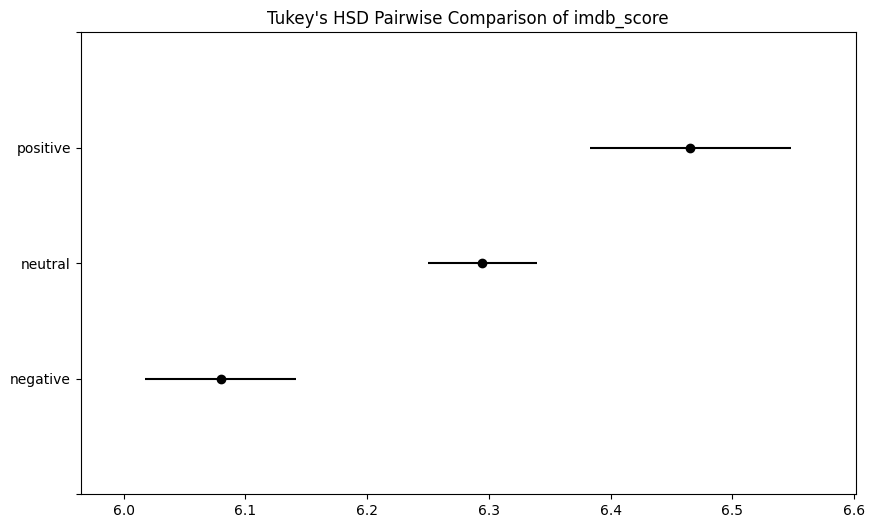

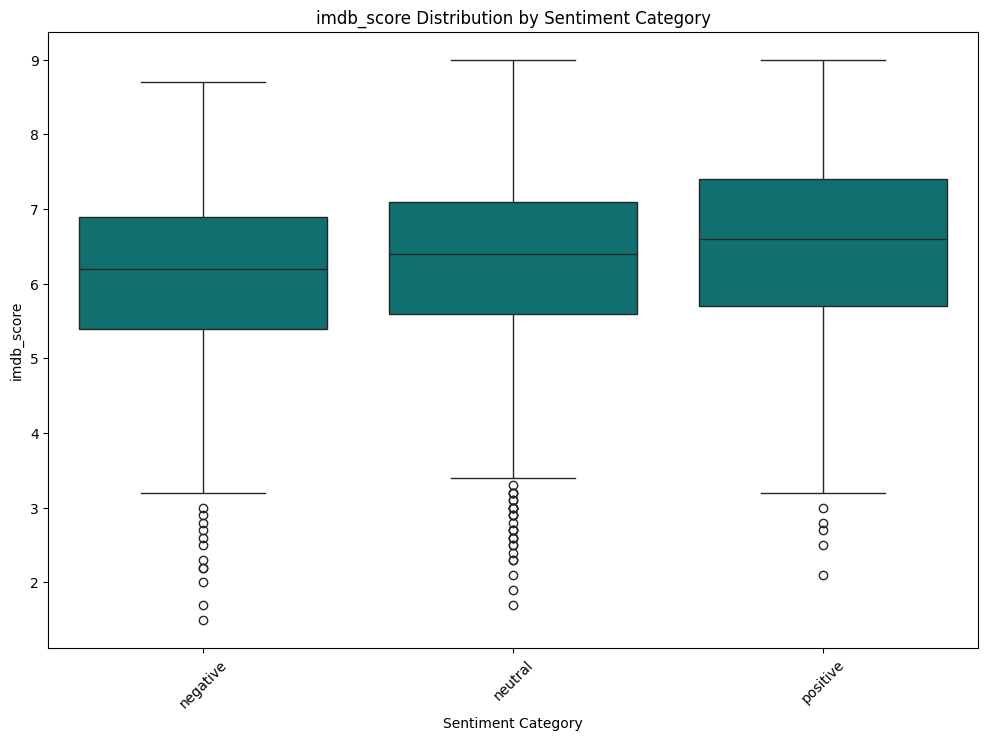

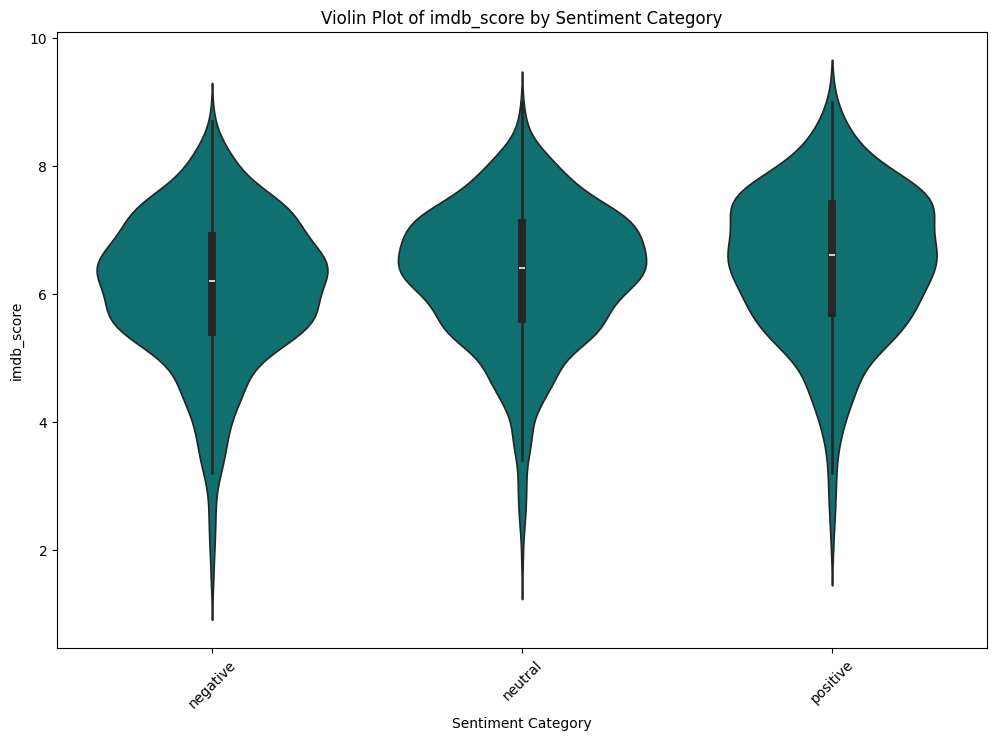

In [11]:
def sentiment_anova(data: pd.DataFrame, column: str, grouping: str ="Bert_class", alpha: float = .05) -> None:
    """
    Perform a levene test, ANOVA and shows pairwise comparison and then plot the pairwise comparison, box plot and violin plot with the data.

    Parameters:

        data (DataFrame): dataset used.
        column (str): column name from the DataFrame to use for the comparison
        grouping (str): column name by which to group the data by

    Returns:
        None
    """
    # Group the data by sentiment category
    sentiment_groups = [group[column].values for name, group in data.groupby(grouping, observed=False)]

    # Perform Levene's test
    stat, p_value = levene(*sentiment_groups)

    print("Homogeneity of Variances (Homoscedasticity):")
    print(f"Levene's Test Statistic: {stat:.2f}")
    print(f"Levene's Test p-value: {p_value:.3f}")

    if p_value < 0.05:
        print("There is significant evidence to reject the null hypothesis of equal variances.")
    else:
        print("There is no significant evidence to reject the null hypothesis of equal variances.")
        
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*sentiment_groups)
    print("\nOne-way ANOVA Results:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"p-value: {p_value:.3f}")

    # Summary statistics
    summary_stats = data.groupby(grouping, observed=False)[column].agg([
        ("count", "count"),
        ("mean", "mean"),
        ("median", "median"),
        ("std", "std"),
        ("min", "min"),
        ("max", "max")
    ])
    summary_stats = summary_stats.round(2)
    print("\nSummary Statistics:")
    print(summary_stats)
    
    if p_value < alpha:
        print(f"\nThe p-value ({p_value:.3f}) is less than {alpha}.")
        print(f"There is a statistically significant difference in {column} across sentiment categories.")
        # Perform Tukey's HSD Test for pairwise comparisons
        tukey_results = pairwise_tukeyhsd(endog=data[column], groups=data[grouping], alpha=0.05)
        print("\nTukey's HSD Pairwise Comparisons:")
        print(tukey_results)
        # Visualization of Tukey's HSD results
        plt.figure(figsize=(12, 8))
        tukey_results.plot_simultaneous()
        plt.title(f"Tukey's HSD Pairwise Comparison of {column}")
    else:
        print(f"\nThe p-value ({p_value:.3f}) is greater than {alpha}.")
        print(f"There is no statistically significant difference in {column} across sentiment categories.\nNo further analysis will be performed.")

    # Visualization of distribution
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=grouping, y=column, data=data, color="teal")
    plt.title(f"{column} Distribution by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)

    # Additional violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=grouping, y=column, data=data, color="teal")
    plt.title(f"Violin Plot of {column} by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
    return None

sentiment_anova(movies_df, "imdb_score")

Homogeneity of Variances (Homoscedasticity):
Levene's Test Statistic: 7.28
Levene's Test p-value: 0.001
There is significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 4.01
p-value: 0.018

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative      363  7.05     7.2  0.99  2.3  9.5
neutral      1114  7.06     7.2  1.06  1.6  9.6
positive      398  6.88     7.0  1.21  2.3  9.6

The p-value (0.018) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Tukey's HSD Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
negative  neutral   0.0096  0.988 -0.1432  0.1625  False
negative positive  -0.1649 0.0885 -0.3485  0.0186  False
 neutral positive  -0.1746 0.0155 -0.3222 -0.02

<Figure size 1200x800 with 0 Axes>

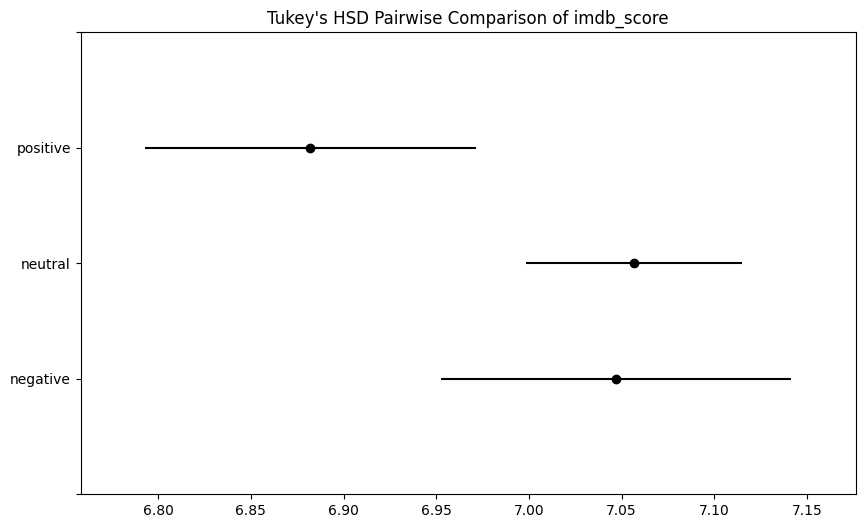

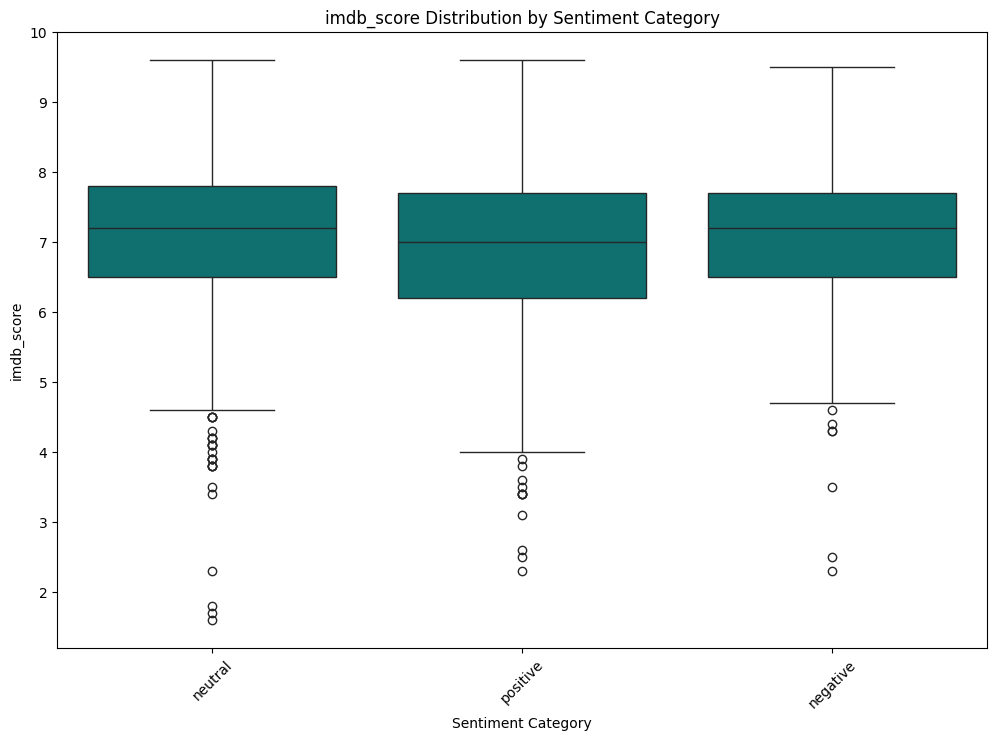

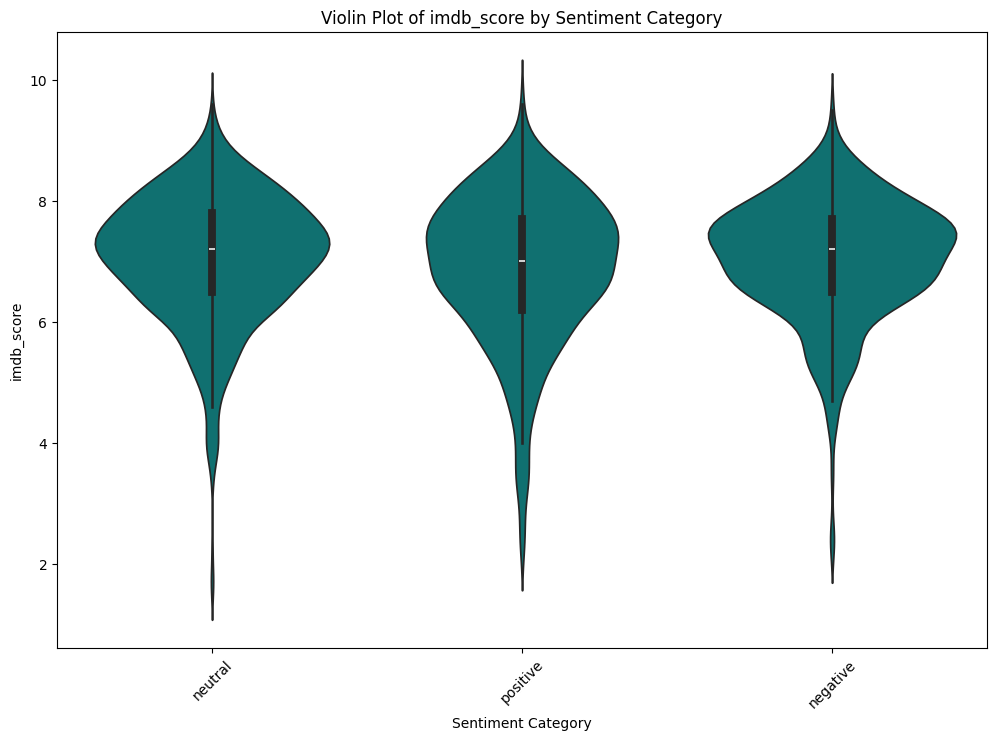

In [12]:
sentiment_anova(shows_df, "imdb_score")

In [139]:
class PermutationTest:
    """
    A class to analyze differences between groups using permutation tests.
    Supports both two-group comparisons and multi-group ANOVA-style analyses.
    """
    
    def __init__(
        self,
        data: Optional[pd.DataFrame] = None,
        column: Optional[str] = None,
        grouping: str = "Bert_class",
        n_permutations: int = 10_000,
        random_state: Optional[int] = None
    ):
        """Initialize the analyzer with data and parameters."""
        self.data = data.copy() if data is not None else None
        self.column = column
        self.grouping = grouping
        self.n_permutations = n_permutations
        
        if random_state is not None:
            np.random.seed(random_state)
        
        if data is not None:
            self._validate_inputs()
        
        # Store results
        self.omnibus_results = None
        self.pairwise_results = None
        self.two_group_results = None
        
    def _validate_inputs(self):
        """Validate input data and columns."""
        if self.column not in self.data.columns:
            raise ValueError(f"Column '{self.column}' not found in the DataFrame")
        if self.grouping not in self.data.columns:
            raise ValueError(f"Grouping column '{self.grouping}' not found in the DataFrame")
            
    def run_two_group_test(
        self,
        df1: pd.DataFrame,
        df2: pd.DataFrame,
        column: str,
        group1_name: str,
        group2_name: str) -> Dict:
        """
        Perform a permutation test comparing two groups using separate DataFrames.
        
        Parameters:
        -----------
        df1 : pd.DataFrame
            First DataFrame to compare
        df2 : pd.DataFrame
            Second DataFrame to compare
        column : str
            Name of the column to compare between DataFrames
            
        Returns:
        --------
        Dict containing test results
        """
        # Validate inputs
        if column not in df1.columns or column not in df2.columns:
            raise ValueError(f"Column '{column}' must be present in both DataFrames")
            
        # Get values from each DataFrame
        values1 = df1[column].dropna()
        values2 = df2[column].dropna()
        
        mean1 = values1.mean()
        mean2 = values2.mean()
        combined_values = np.concatenate([values1, values2])
        observed_diff = np.mean(values1) - np.mean(values2)
        perm_diffs = []
        
        for _ in range(self.n_permutations):
            permuted = np.random.permutation(combined_values)
            permuted_mean1 = permuted[:len(values1)].mean()
            permuted_mean2 = permuted[len(values1):].mean()
            permuted_diff = permuted_mean1 - permuted_mean2
            perm_diffs.append(permuted_diff)

        p_value = np.mean(abs(np.array(perm_diffs)) >= abs(observed_diff))
        
         # Calculate standard errors
        std1 = values1.std(ddof=1)
        std2 = values2.std(ddof=1)
        se1 = std1 / np.sqrt(len(values1))
        se2 = std2 / np.sqrt(len(values2))
        
        self.two_group_results = {
            'group1_name': group1_name,
            'group2_name': group2_name,
            'group1_mean': mean1,
            'group2_mean': mean2,
            'group1_n': len(values1),
            'group2_n': len(values2),
            'group1_se': se1,
            'group2_se': se2,
            'mean_difference': observed_diff,
            'p_value': p_value,
            'permutation_diffs': perm_diffs,
            'column': column
        }
        
        self._print_two_group_results()
        return self.two_group_results


    def plot_two_group_comparison(self) -> None:
        """Plot results of two-group comparison with permutation distribution."""
        if self.two_group_results is None:
            raise ValueError("Must run two_group_test before plotting")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        group1_name = self.two_group_results['group1_name']
        group2_name = self.two_group_results['group2_name']
        
        group_means = [
            self.two_group_results['group1_mean'],
            self.two_group_results['group2_mean']
        ]
        group_sizes = [
            self.two_group_results['group1_n'],
            self.two_group_results['group2_n']
        ]
        group_ses = [
            self.two_group_results['group1_se'],
            self.two_group_results['group2_se']
        ]
        
        # Permutation distribution histogram
        perm_diffs = self.two_group_results['permutation_diffs']
        sns.histplot(
            perm_diffs,
            kde=True,
            color='teal',
            ax=ax1
        )
        ax1.axvline(
            self.two_group_results['mean_difference'],
            color='red',
            linestyle='dashed',
            linewidth=2,
            label=f'Observed Difference: {self.two_group_results["mean_difference"]:.2f}'
        )
         
        p_plot = 'p < .001' if self.two_group_results['p_value'] < 0.001 else f'p = {self.two_group_results["p_value"]:.3f}'
        ax1.set_title(f'Permutation Distribution, {p_plot}')
        ax1.set_xlabel('Mean Difference')
        ax1.set_ylabel('Frequency')
        ax1.legend()
        
        # Bar plot with standard errors
        if self.two_group_results['p_value'] < 0.05:
            ax2.bar(
                [group1_name, group2_name],
                group_means,
                yerr=group_ses,
                capsize=5,
                color=['darkred', 'teal']
            )
            ax2.set_title(f'Group Comparison: {self.two_group_results["column"]}')
            ax2.set_ylabel(f'{self.two_group_results["column"]} Mean Value')
            ax2.set_xlabel('Group')
            plt.tight_layout()
        else:
            ax2.axis('off')

    def _print_two_group_results(self):
        """Print formatted results of two-group comparison."""
        results = self.two_group_results
        print("\nTwo-Group Permutation Test Results:")
        print(f"\nComparing {results['column']} between {results['group1_name']} and {results['group2_name']}:")
        print(f"{results['group1_name']}: n = {results['group1_n']}, mean = {results['group1_mean']:.2f}, SE = {results['group1_se']:.2f}")
        print(f"{results['group2_name']}: n = {results['group2_n']}, mean = {results['group2_mean']:.2f}, SE = {results['group2_se']:.2f}")
        print(f"Mean Difference: {results['mean_difference']:.2f}")
        print(f"p-value: {'p < .001' if results['p_value'] < 0.001 else f'p = {results["p_value"]:.3f}'}")

    def _compute_test_statistic(self, data: pd.DataFrame) -> float:
        """Compute the F-statistic (between-group variance / within-group variance)."""
        group_means = data.groupby(self.grouping)[self.column].mean()
        overall_mean = data[self.column].mean()
        group_sizes = data.groupby(self.grouping).size()
        # Between-group variance 
        between_group_variance = sum(
            group_sizes[label] * (group_mean - overall_mean)**2 
            for label, group_mean in group_means.items()
        ) / (len(group_means) - 1)
        # Within-group variance
        within_group_variance = sum(
            ((data[data[self.grouping] == label][self.column] - group_mean)**2).sum()
            for label, group_mean in group_means.items()
        ) / (len(data) - len(group_means))
        
        return between_group_variance / within_group_variance
    
    def run_omnibus_test(self) -> Dict:
        """Perform omnibus permutation test for overall group differences."""
        observed_statistic = self._compute_test_statistic(self.data)
        perm_stats = []
        
        for _ in range(self.n_permutations):
            permuted_data = self.data.copy()
            permuted_data[self.grouping] = np.random.permutation(permuted_data[self.grouping])
            perm_stat = self._compute_test_statistic(permuted_data)
            perm_stats.append(perm_stat)

        p_value = np.mean(np.array(perm_stats) >= observed_statistic)
        
        self.omnibus_results = {
            'observed_statistic': observed_statistic,
            'p_value': p_value,
            'group_means': dict(self.data.groupby(self.grouping)[self.column].mean()),
            'group_sizes': dict(self.data.groupby(self.grouping).size()),
            'permutation_stats': perm_stats
        }
        
        self._print_omnibus_results()
        return self.omnibus_results
    
    def run_pairwise_tests(self, correction: str = 'bonferroni') -> Dict[Tuple[str, str], Dict]:
        """Perform pairwise permutation tests between all groups."""
        if self.omnibus_results is None:
            self.run_omnibus_test()
            
        if self.omnibus_results['p_value'] > 0.05:
            print("\nOmnibus test not significant. Skipping pairwise comparisons.")
            return None
            
        groups = self.data[self.grouping].unique()
        self.pairwise_results = {}
        
        for i in range(len(groups)):
            for j in range(i+1, len(groups)):
                group1, group2 = groups[i], groups[j]
                group_data = self.data[self.data[self.grouping].isin([group1, group2])]
                
                mean1 = group_data[group_data[self.grouping] == group1][self.column].mean()
                mean2 = group_data[group_data[self.grouping] == group2][self.column].mean()
                observed_diff = abs(mean1 - mean2)
                
                perm_diffs = []
                for _ in range(self.n_permutations):
                    permuted_data = group_data.copy()
                    permuted_data[self.grouping] = np.random.permutation(permuted_data[self.grouping])
                    perm_mean1 = permuted_data[permuted_data[self.grouping] == group1][self.column].mean()
                    perm_mean2 = permuted_data[permuted_data[self.grouping] == group2][self.column].mean()
                    perm_diffs.append(abs(perm_mean1 - perm_mean2))
                
                p_value = np.mean(np.array(perm_diffs) >= observed_diff)
                self.pairwise_results[(group1, group2)] = {
                    'mean_difference': observed_diff,
                    'p_value': p_value,
                    'group1_mean': mean1,
                    'group2_mean': mean2
                }
        
        if correction.lower() == 'bonferroni':
            self._apply_bonferroni_correction()
            
        self._print_pairwise_results()
        return self.pairwise_results
    
    def _apply_bonferroni_correction(self):
        """Apply Bonferroni correction to pairwise p-values."""
        num_tests = len(self.pairwise_results)
        for key in self.pairwise_results:
            self.pairwise_results[key]['adjusted_p_value'] = min(
                self.pairwise_results[key]['p_value'] * num_tests, 1.0
            )
    
    def plot_permutation_distribution(self) -> None:
        """Plot the permutation distribution with the observed statistic."""
        if self.omnibus_results is None:
            self.run_omnibus_test()
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.histplot(self.omnibus_results['permutation_stats'], kde=True, color='teal', ax=ax1)
        ax1.axvline(
            self.omnibus_results['observed_statistic'], 
            color='red', 
            linestyle='dashed', 
            linewidth=2, 
            label=f'Observed Statistic: {self.omnibus_results["observed_statistic"]:.2f}'
        )
        p_print = 'p < .001' if self.omnibus_results['p_value'] < 0.001 \
            else f'p = {self.omnibus_results["p_value"]:.3f}'
        ax1.set_title(f'F-statistic Permutation Distribution\n{self.column} across {self.grouping}, {p_print}')
        ax1.set_xlabel('F-statistic')
        ax1.set_ylabel('Frequency')
        ax1.legend()
      
        if self.pairwise_results is not None:
            self.plot_pairwise_comparisons(ax2, run_tests=False)

    def plot_pairwise_comparisons(self, ax2: plt.Axes, alpha: float = 0.05, run_tests: bool = True) -> None:
        """Plot violin plots with significance indicators for pairwise comparisons."""
        if run_tests and self.pairwise_results is None:
            self.run_pairwise_tests()
            
        if self.pairwise_results is None:  # If omnibus test wasn't significant
            return
            
        sns.violinplot(x=self.grouping, y=self.column, data=self.data, color="teal", ax=ax2)
        ax2.set_title(f'Pairwise Comparisons: {self.column} across {self.grouping}')
        ax2.set_xlabel(self.grouping)
        ax2.set_ylabel(self.column)
      
        
        self._add_significance_indicators(ax2, alpha, plot_type='violin')
        plt.tight_layout()
        
    def plot_pairwise_comparisons_bar(self, alpha: float = 0.05) -> None:
        """Plot bar plot with standard error bars and significance indicators for pairwise comparisons."""
        if self.pairwise_results is None:
            return
            
        # Calculate means and standard errors for each group
        group_stats = {}
        for group in self.data[self.grouping].unique():
            group_data = self.data[self.data[self.grouping] == group][self.column]
            group_stats[group] = {
                'mean': group_data.mean(),
                'se': group_data.std() / np.sqrt(len(group_data)),
                'n': len(group_data)
            }
        
        # Prepare data for plotting
        groups = list(group_stats.keys())
        means = [group_stats[g]['mean'] for g in groups]
        ses = [group_stats[g]['se'] for g in groups]
        
        fig, ax = plt.subplots(figsize=(10, 6))
        # Create bar plot
        bars = ax.bar(
            range(len(groups)),
            means,
            yerr=ses,
            capsize=5,
            color='teal',
            error_kw={'ecolor': 'black', 'capthick': 1}
        )

        # Customize plot
        ax.set_title(f'Pairwise Comparisons: {self.column} across {self.grouping}')
        ax.set_xlabel(self.grouping)
        ax.set_ylabel(f'Mean {self.column} (± SE)')
        ax.set_xticks(range(len(groups)))
        ax.set_xticklabels(groups)
       
        # Add significance indicators
        self._add_significance_indicators(ax, alpha, plot_type='bar')
        
        # Adjust layout
        plt.tight_layout()
        
        return ax
    
    def _add_significance_indicators(self, ax: plt.Axes, alpha: float, plot_type: str):
        """Add significance indicators to pairwise comparison plot.

        Parameters:
        -----------
        ax : plt.Axes
            The axes object to add the significance indicators to.
        alpha : float
            The significance threshold (e.g., 0.05).
        plot_type : str
            The type of plot: either 'bar' or 'violin'. 
        """
        groups = sorted(self.data[self.grouping].unique())
        
        # Determine y-axis maximum and step for positioning significance lines
        if plot_type == 'bar':
            group_stats = {}
            for group in groups:
                group_data = self.data[self.data[self.grouping] == group][self.column]
                group_stats[group] = {
                    'mean': group_data.mean(),
                    'se': group_data.std() / np.sqrt(len(group_data)),
                    'n': len(group_data)
                }
            
            # Get the max height of the bars
            y_max = max([group_stats[g]['mean'] + group_stats[g]['se'] for g in groups])
            y_step = y_max * 0.1  # Set step based on max bar height
        elif plot_type == 'violin':
            # For violin plots, we consider the distribution, so take the max from the violin plot's y-axis.
            y_max = ax.get_ylim()[1]
            y_step = (y_max - ax.get_ylim()[0]) * 0.1
        
        comparison_y_pos = y_max + y_step
        comparison_y_pos -= y_step * 0.4 # Adjust for better positioning
        
        # Plot significance lines
        for (group1, group2), results in self.pairwise_results.items():
            if results['adjusted_p_value'] <= alpha:
                idx1 = groups.index(group1)
                idx2 = groups.index(group2)
                adjusted_p_value = f'p < .001' if results["adjusted_p_value"] < .001 else f'p = {results["adjusted_p_value"]:.3f}'
                
                # Plot the significance line between the groups
                ax.plot([idx1, idx2], [comparison_y_pos, comparison_y_pos], 
                        color='red', linewidth=1)
                ax.text((idx1 + idx2) / 2, comparison_y_pos, 
                        adjusted_p_value, 
                        horizontalalignment='center', 
                        verticalalignment='bottom',
                        color='red')
                comparison_y_pos += y_step
        
        # Adjust y-limits to make room for significance annotations
        ax.set_ylim(top=comparison_y_pos + y_step)

    
    def _print_omnibus_results(self):
        """Print formatted omnibus test results."""
        print("Omnibus Permutation Test Results:")
        print(f"F-statistic: {self.omnibus_results['observed_statistic']:.2f}")
        print(f"p-value: {'p < .001' if self.omnibus_results['p_value'] < .001 else f'{self.omnibus_results["p_value"]:.3f}'}")
        print("\nGroup Means:")
        for group, mean in self.omnibus_results['group_means'].items():
            print(f"{group}: {mean:.2f}")
    
    def _print_pairwise_results(self):
        """Print formatted pairwise test results."""
        print("\nPairwise Permutation Test Results:")
        for (group1, group2), results in self.pairwise_results.items():
            p_value = "p < .001" if results['p_value'] < 0.001 else f"p = {results['p_value']:.3f}"
            adjusted_p_value = "p < .001" if results['adjusted_p_value'] < 0.001 else f"p = {results['adjusted_p_value']:.3f}"
            
            print(f"\n{group1} vs {group2}:")
            print(f"Mean Difference: {results['mean_difference']:.2f}")
            print(f"p-value: {p_value}")
            print(f"Adjusted p-value (Bonferroni): {adjusted_p_value}")
    
    def analyze_permanova(self, plot: bool = True) -> Dict:
        """Run complete analysis workflow."""
        self.run_omnibus_test()
        
        if self.omnibus_results['p_value'] <= 0.05:
            print("\nOmnibus Permutation Test is significant, proceeding to pairwise comparisons...")
            self.run_pairwise_tests()
        else:
            print("\nOmnibus Permutation Test didn't reach significance, no further analysis required.")
            
        if plot:
            self.plot_permutation_distribution()
            self.plot_pairwise_comparisons_bar()
            
        # return {
        #     'omnibus_results': self.omnibus_results,
        #     'pairwise_results': self.pairwise_results
        # }

Omnibus Permutation Test Results:
F-statistic: 21.03
p-value: p < .001

Group Means:
negative: 6.08
neutral: 6.29
positive: 6.47

Omnibus Permutation Test is significant, proceeding to pairwise comparisons...

Pairwise Permutation Test Results:

negative vs neutral:
Mean Difference: 0.22
p-value: p < .001
Adjusted p-value (Bonferroni): p < .001

negative vs positive:
Mean Difference: 0.39
p-value: p < .001
Adjusted p-value (Bonferroni): p < .001

neutral vs positive:
Mean Difference: 0.17
p-value: p = 0.002
Adjusted p-value (Bonferroni): p = 0.006


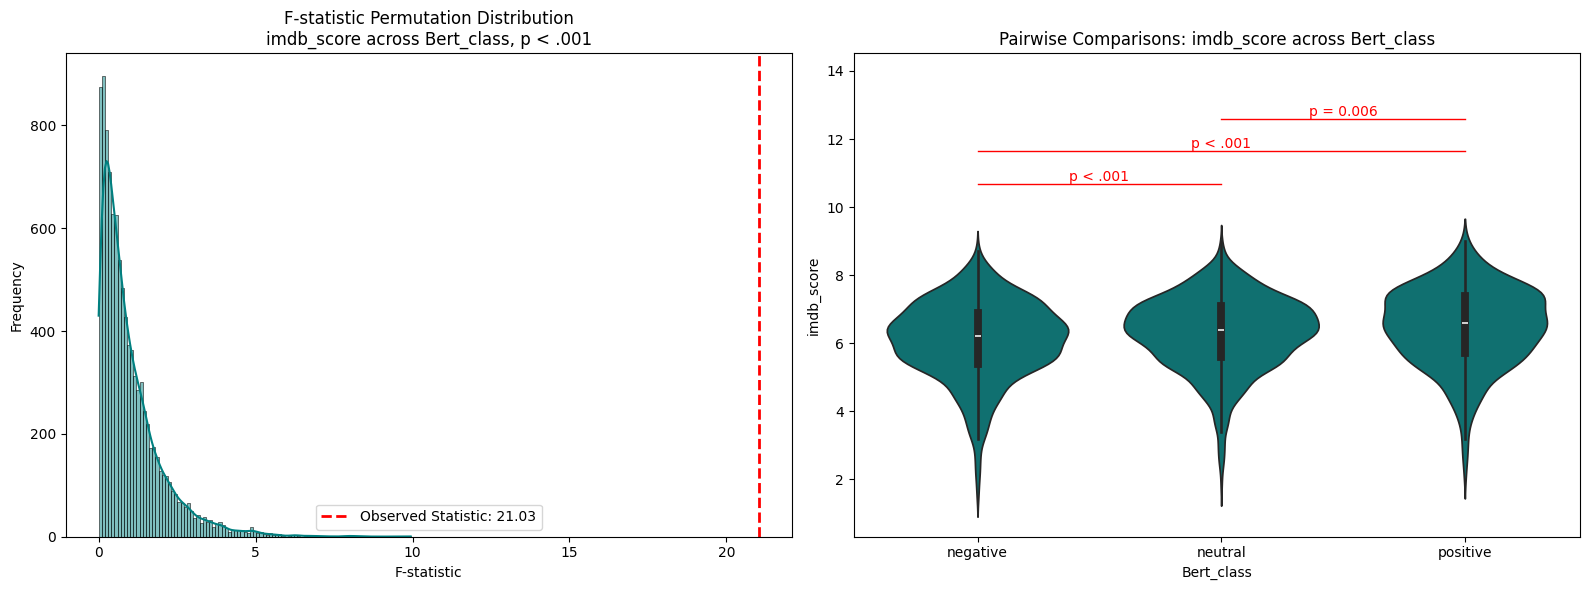

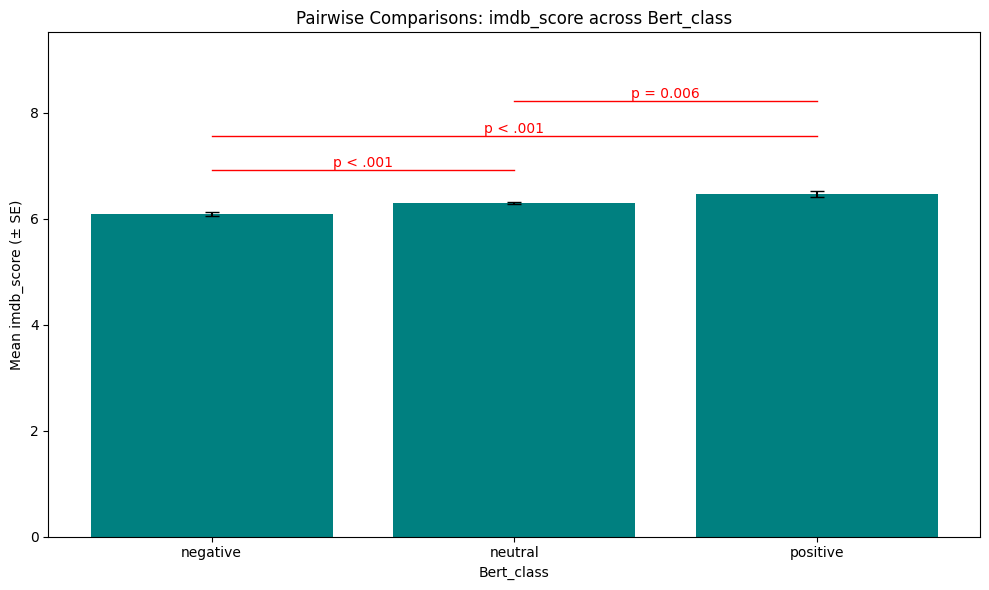

In [140]:
permanova = PermutationTest(movies_df, "imdb_score", random_state=42)
permanova.analyze_permanova()

Omnibus Permutation Test Results:
F-statistic: 4.01
p-value: 0.018

Group Means:
negative: 7.05
neutral: 7.06
positive: 6.88

Omnibus Permutation Test is significant, proceeding to pairwise comparisons...

Pairwise Permutation Test Results:

neutral vs positive:
Mean Difference: 0.17
p-value: p = 0.006
Adjusted p-value (Bonferroni): p = 0.019

neutral vs negative:
Mean Difference: 0.01
p-value: p = 0.877
Adjusted p-value (Bonferroni): p = 1.000

positive vs negative:
Mean Difference: 0.16
p-value: p = 0.039
Adjusted p-value (Bonferroni): p = 0.116


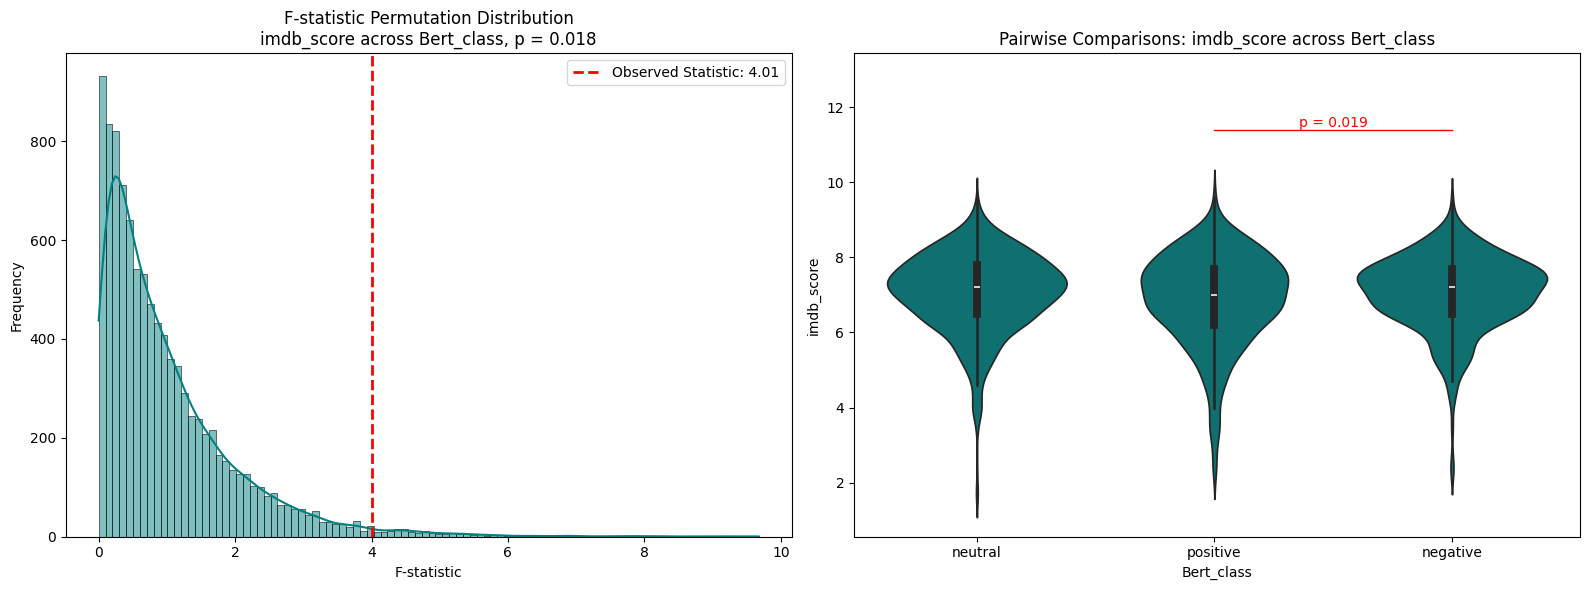

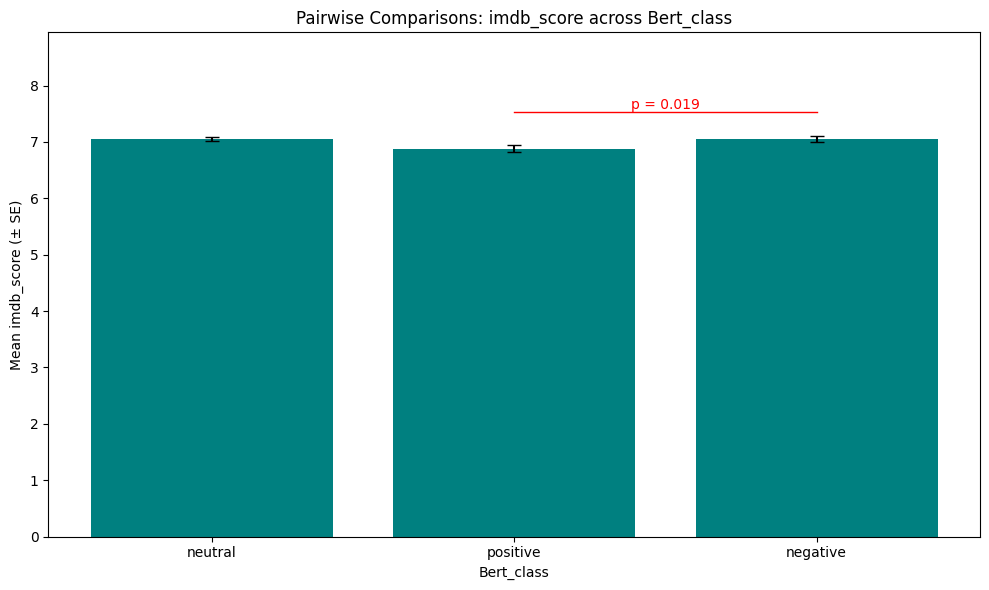

In [141]:
permanova = PermutationTest(shows_df, "imdb_score", random_state=42)
permanova.analyze_permanova()

## Q3: Do movies or shows on Netflix get better IMDb ratings (a)?


Two-Group Permutation Test Results:

Comparing imdb_score between Movies and TV Shows:
Movies: n = 3403, mean = 6.27, SE = 0.02
TV Shows: n = 1875, mean = 7.02, SE = 0.02
Mean Difference: -0.75
p-value: p < .001


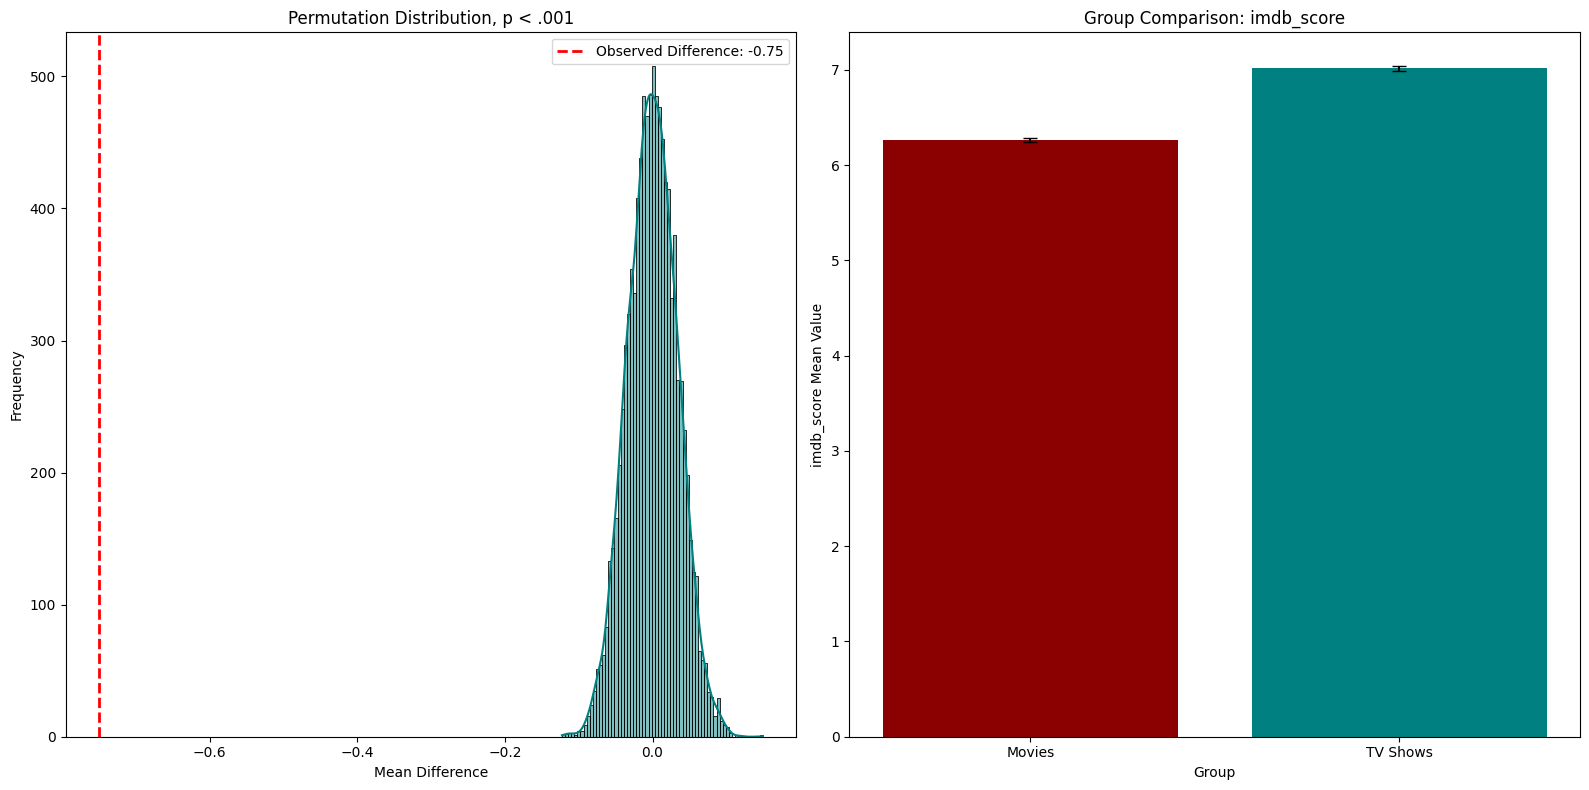

In [105]:
permutation_test = PermutationTest(random_state=42)
permutation_test.run_two_group_test(movies_df, shows_df, "imdb_score", "Movies", "TV Shows")
permutation_test.plot_two_group_comparison()

## Q3: Do movies or shows on Netflix get more IMDb votes (b)?


Two-Group Permutation Test Results:

Comparing imdb_votes between Movies and TV Shows:
Movies: n = 3388, mean = 26706.82, SE = 1627.80
TV Shows: n = 1875, mean = 17494.87, SE = 1641.75
Mean Difference: 9211.95
p-value: p < .001


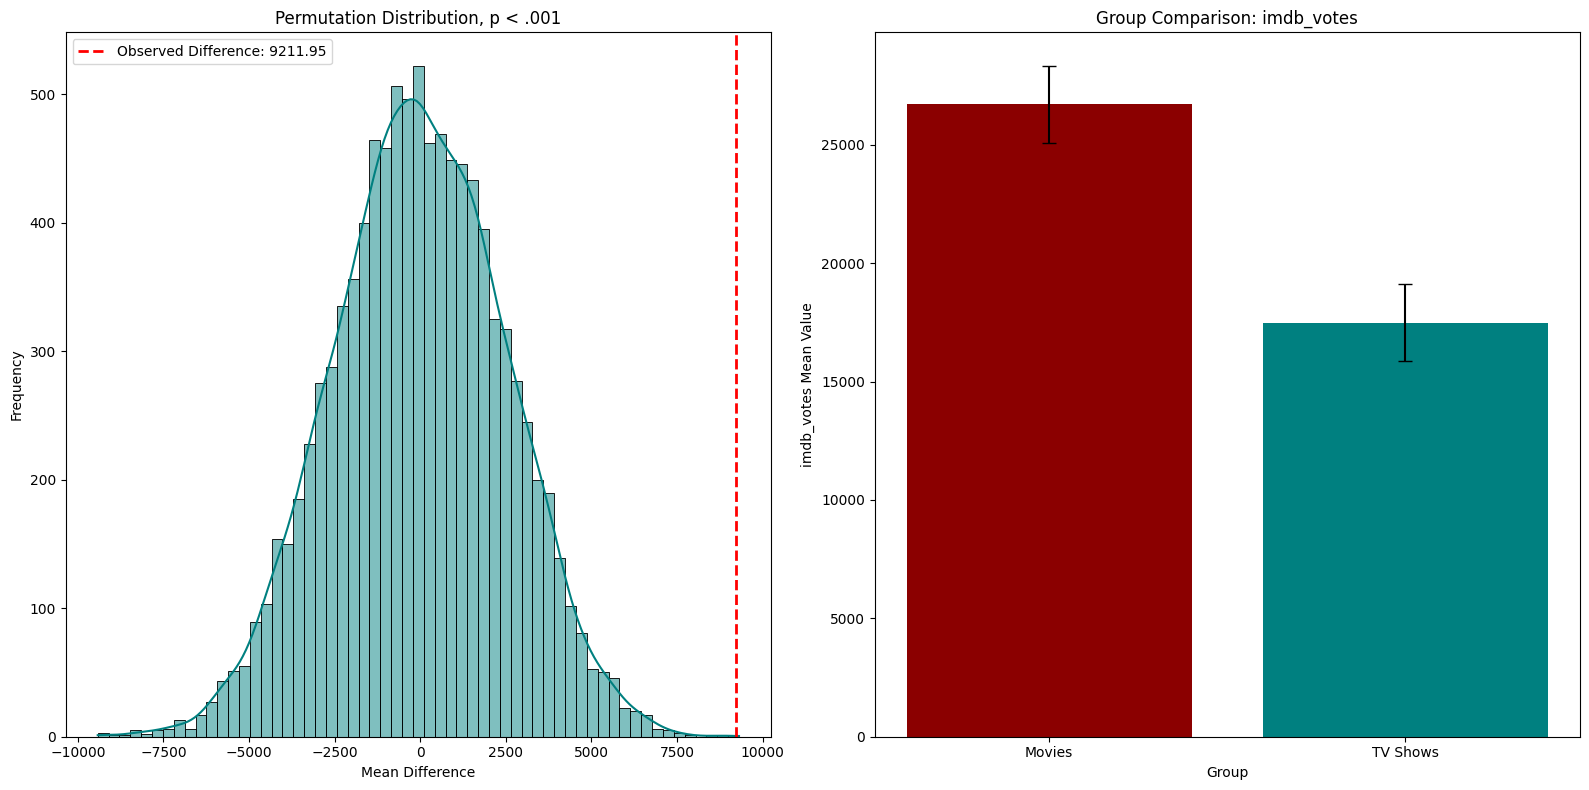

In [106]:
permutation_test = PermutationTest(random_state=42)
permutation_test.run_two_group_test(movies_df, shows_df, "imdb_votes", "Movies", "TV Shows")
permutation_test.plot_two_group_comparison()

## Q3: Do movies and shows on Netflix differ in runtime (c)?


Two-Group Permutation Test Results:

Comparing runtime between Movies and TV Shows:
Movies: n = 3403, mean = 101.57, SE = 0.48
TV Shows: n = 1875, mean = 38.63, SE = 0.41
Mean Difference: 62.94
p-value: p < .001


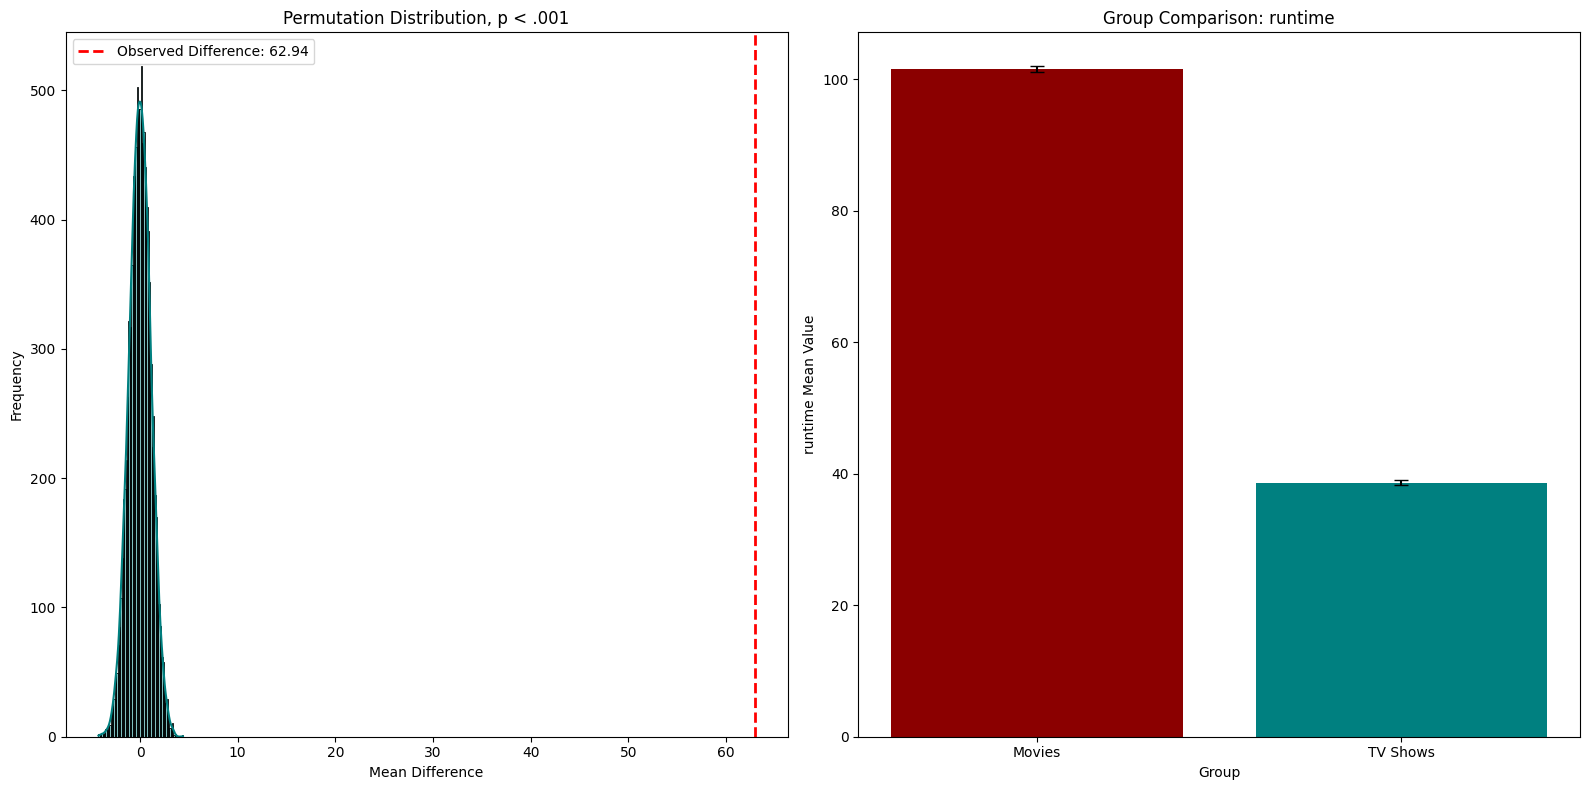

In [103]:
permutation_test = PermutationTest(random_state=42)
permutation_test.run_two_group_test(movies_df, shows_df, "runtime", "Movies", "TV Shows")
permutation_test.plot_two_group_comparison()